In [1]:
import re
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('../../data/filtered_samsung_news_with_outcome.xlsx')

# 텍스트 전처리 함수 정의 (특수 문자 제거)
def preprocess_text(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]", "", text)  # 특수 문자 제거
    tokens = text.split()  # 공백으로 간단히 토큰화
    return tokens

# 텍스트 데이터 토큰화
df['tokens'] = df['summary_content'].apply(preprocess_text)

In [3]:
# Word2Vec 모델 학습
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4, sg=1)

# 문장 벡터 생성 함수 (단어 벡터의 평균 계산)
def get_sentence_vector(tokens, model):
    vector = np.mean([model.wv[token] for token in tokens if token in model.wv], axis=0)
    return vector if isinstance(vector, np.ndarray) else np.zeros(model.vector_size)

# 각 문장의 벡터 계산
df['vector'] = df['tokens'].apply(lambda x: get_sentence_vector(x, model))

In [17]:
# 군집화를 위한 벡터 준비
vectors = np.array(df['vector'].tolist())# 군집화를 위한 벡터 준비
vectors = np.array(df['vector'].tolist())

# KMeans 클러스터링 (군집 개수를 2로 설정)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(vectors)
df['cluster'] = clusters

# 클러스터의 개수 확인
print(f"클러스터 개수 확인: {len(set(clusters))}")  # 클러스터의 유니크 개수 확인

클러스터 개수 확인: 2


c:\Anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


총 데이터 포인트 수: 16521
고유한 데이터 포인트 수: 74


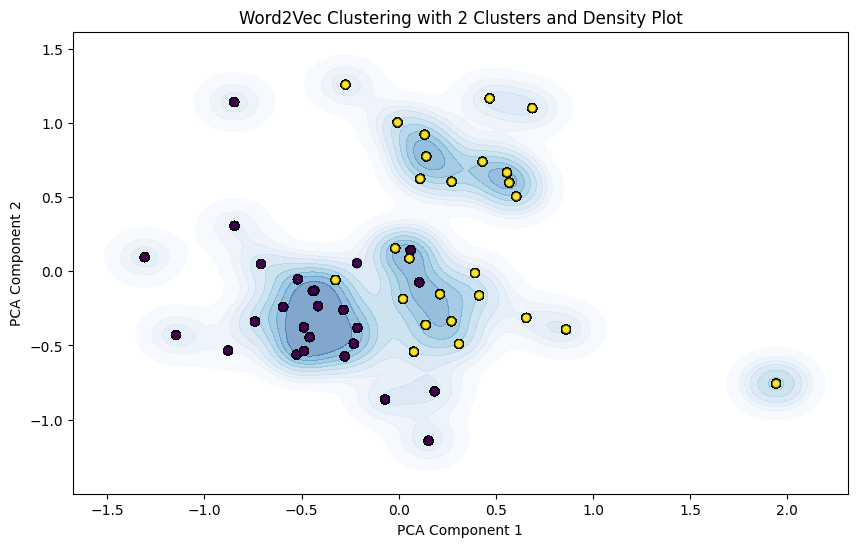

In [22]:
import seaborn as sns
# KMeans 클러스터링 (군집 개수를 2로 설정)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(vectors)
df['cluster'] = clusters

# 시각화를 위해 차원 축소 (PCA 사용)
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# 데이터 크기 확인
print(f"총 데이터 포인트 수: {len(reduced_vectors)}")  # 확인용

# 중복된 데이터 포인트 수 확인
unique_points = np.unique(reduced_vectors, axis=0)
print(f"고유한 데이터 포인트 수: {len(unique_points)}")  # 중복되지 않은 고유 좌표 수 확인

# 클러스터 시각화 (밀도 플롯 추가)
plt.figure(figsize=(10, 6))
sns.kdeplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], cmap='Blues', fill=True, alpha=0.5)
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis', alpha=0.3, edgecolor='k')
plt.title('Word2Vec Clustering with 2 Clusters and Density Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()